# Import and Instal Dependencies

In [ ]:
# !pip install seaborn

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2024-06-02 22:27:55.337753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 22:27:56.460361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-06-02 22:27:59.296116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 22:27:59.533930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 22:27:59.534001: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# Gathering Data

## Export Data

In [3]:
csv_path = '../dataset/grip_v3.csv' # where the file located

dataset = pd.read_csv(csv_path) # read csv file
dataset

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,0.499149,0.266892,0.043326,0.999141,0.511083,0.256799,0.035661,0.998834,0.514423,...,0.046194,0.599552,0.381094,0.968420,-0.325524,0.925438,0.388877,0.944479,-0.047822,0.694964
1,0,0.509033,0.223467,0.295538,0.999649,0.518269,0.214053,0.300971,0.999535,0.521658,...,-0.078674,0.753024,0.375967,0.857026,-0.491062,0.967512,0.382567,0.844172,-0.160879,0.848917
2,0,0.513299,0.212428,0.283837,0.999684,0.524117,0.201967,0.286650,0.999582,0.527175,...,-0.119032,0.756834,0.373458,0.846111,-0.488135,0.970251,0.380956,0.832799,-0.195948,0.857096
3,0,0.514768,0.213250,0.312397,0.999714,0.526127,0.205110,0.322298,0.999623,0.529314,...,-0.132196,0.753124,0.368082,0.839044,-0.500623,0.972182,0.374659,0.823874,-0.213484,0.860250
4,0,0.515310,0.195890,0.303897,0.999742,0.526415,0.186681,0.304144,0.999660,0.529768,...,-0.132166,0.752864,0.367352,0.823251,-0.496022,0.974380,0.371233,0.811567,-0.211274,0.864598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2,0.485190,0.149403,-0.061788,0.999871,0.490079,0.142063,-0.033001,0.999852,0.494363,...,-0.097207,0.691791,0.657733,0.815572,-0.046292,0.811813,0.621959,0.833392,-0.222118,0.877037
3017,2,0.486743,0.175549,-0.042018,0.999915,0.491584,0.167633,-0.009633,0.999902,0.495546,...,-0.134906,0.728007,0.662888,0.829441,-0.059802,0.823775,0.624482,0.858721,-0.274207,0.891445
3018,2,0.520076,0.266661,-0.140496,0.999942,0.530401,0.259351,-0.112462,0.999923,0.533945,...,-0.060630,0.668493,0.576993,0.899778,-0.088321,0.663435,0.563957,0.935424,-0.214565,0.716072
3019,2,0.492402,0.146343,-0.063893,0.999840,0.497051,0.137886,-0.037698,0.999768,0.501305,...,-0.094921,0.712497,0.643015,0.809356,-0.039770,0.674288,0.613316,0.834492,-0.223702,0.744070


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Columns: 133 entries, class to v33
dtypes: float64(132), int64(1)
memory usage: 3.1 MB


This dataset has 3020 rows with 3 class.
- 0 => Normal Grip
- 1 => Close Grip
- 2 => Wide Grip

# Assessing Data

In [5]:
# check information about dataset
dataset.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   3021 non-null   int64  
 1    x1      3021 non-null   float64
 2    y1      3021 non-null   float64
 3    z1      3021 non-null   float64
 4    v1      3021 non-null   float64
 5    x2      3021 non-null   float64
 6    y2      3021 non-null   float64
 7    z2      3021 non-null   float64
 8    v2      3021 non-null   float64
 9    x3      3021 non-null   float64
 10   y3      3021 non-null   float64
 11   z3      3021 non-null   float64
 12   v3      3021 non-null   float64
 13   x4      3021 non-null   float64
 14   y4      3021 non-null   float64
 15   z4      3021 non-null   float64
 16   v4      3021 non-null   float64
 17   x5      3021 non-null   float64
 18   y5      3021 non-null   float64
 19   z5      3021 non-null   float64
 20   v5      3021 non-null   float64
 21   x6      3021

In [6]:
# check for null value
dataset.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [7]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 27 rows


Found 27 rows of duplicated value

In [8]:
# Drop Duplicated data
dataset.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 0 rows


# Data Preprocessing

In [9]:
# Check Ratio For the labels
for i in range(3):
    print("Class {} : {}".format(i, dataset['class'].value_counts()[i]))

Class 0 : 1036
Class 1 : 955
Class 2 : 1003


The dataset is a little bit imbalanced, so we try to solve it with the downsampling method.

In [10]:
# Dividing the dataset based on class
normal_dataset = dataset[dataset['class']==0]
close_dataset = dataset[dataset['class']==1]
wide_dataset = dataset[dataset['class']==2]

print(normal_dataset.shape)
print(close_dataset.shape)
print(wide_dataset.shape)

(1036, 133)
(955, 133)
(1003, 133)


In [11]:
# Balancing the data by minority class, which is close dataset
from sklearn.utils import resample

normal_dataset = resample(normal_dataset,
                          replace = True,
                          n_samples = len(close_dataset),
                          random_state=42)

wide_dataset = resample(wide_dataset,
                          replace = True,
                          n_samples = len(close_dataset),
                          random_state=42)

In [12]:
print(normal_dataset.shape)
print(close_dataset.shape)
print(wide_dataset.shape)

(955, 133)
(955, 133)
(955, 133)


class
0    955
1    955
2    955
Name: count, dtype: int64


<Axes: ylabel='Type'>

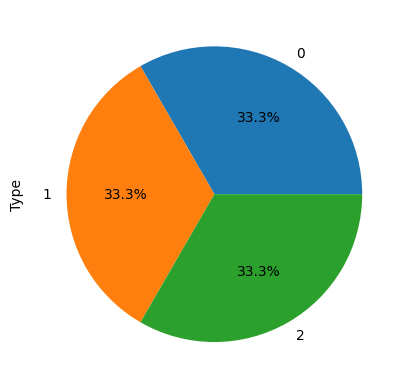

In [13]:
dataset_balanced = pd.concat([normal_dataset, close_dataset, wide_dataset], ignore_index=True)

print(dataset_balanced["class"].value_counts())

dataset_balanced.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Dataset Balanced!**

## Feature Engineering

In [14]:
dataset_balanced

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,0.508356,0.253592,-0.118610,0.999742,0.521205,0.249726,-0.088483,0.999659,0.525710,...,0.655974,0.512854,0.456953,0.893187,-0.083277,0.775774,0.422280,0.834252,0.563463,0.591148
1,0,0.498480,0.291184,0.088486,0.999961,0.507733,0.280571,0.077056,0.999973,0.510833,...,0.055198,0.696694,0.364977,0.982930,-0.362018,0.969037,0.365725,0.961386,-0.036099,0.824839
2,0,0.467394,0.278552,-0.082092,0.999954,0.467392,0.266803,-0.053260,0.999934,0.468548,...,-0.108711,0.909700,0.669396,0.872511,0.033490,0.758174,0.674014,0.882516,-0.256740,0.939495
3,0,0.466706,0.271507,-0.098355,0.999973,0.478951,0.258359,-0.073488,0.999947,0.485432,...,0.335697,0.797759,0.479157,0.929401,-0.111198,0.954172,0.442410,0.911772,0.224995,0.922148
4,0,0.502027,0.090734,0.091084,0.999901,0.512170,0.078167,0.094190,0.999927,0.516567,...,-0.147038,0.720595,0.336410,0.695396,-0.451491,0.982207,0.335943,0.677043,-0.212436,0.906605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2,0.540588,0.142740,-0.069175,0.999922,0.551438,0.135539,-0.041229,0.999841,0.556387,...,0.065187,0.877894,0.490100,0.858393,-0.501207,0.988432,0.364061,0.839558,-0.084683,0.939935
2861,2,0.546194,0.241276,-0.119484,0.999927,0.560162,0.236626,-0.092694,0.999854,0.565507,...,0.187307,0.744352,0.459805,0.965151,-0.230702,0.919326,0.430171,0.939091,0.046716,0.871089
2862,2,0.556325,0.209633,-0.067516,0.999954,0.570048,0.204118,-0.040875,0.999902,0.575458,...,0.168933,0.806879,0.499716,0.950128,-0.269485,0.965600,0.433439,0.928483,0.025381,0.936614
2863,2,0.488228,0.248935,-0.009293,0.999965,0.497420,0.238245,0.004849,0.999949,0.502621,...,0.233062,0.638346,0.441354,0.962359,-0.417642,0.871136,0.370849,0.915116,0.107807,0.756625


The output of the mediapipe consists of 33 coordinate points from head to toe. Each point will have 4 values, namely `X, Y, and Z` (For point coordinates) and `visibility` for the value of the point confidence.

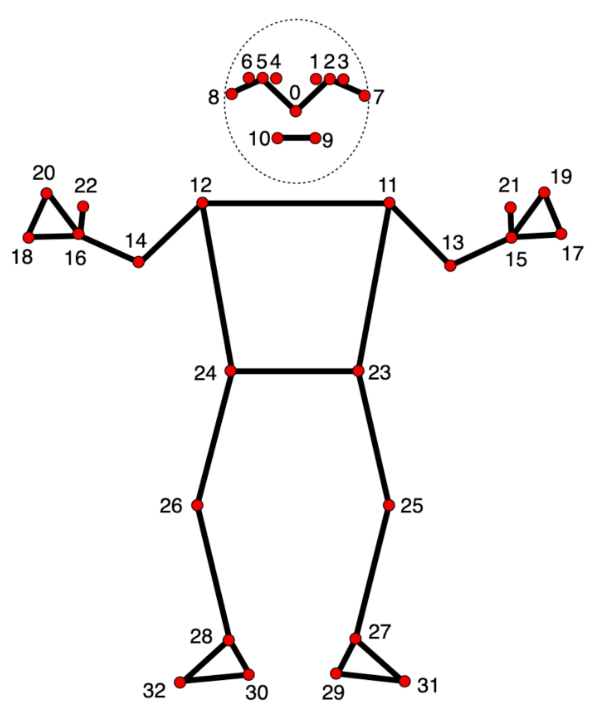

In [16]:
# see corelation map each data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataset_balanced.corr())

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
class,1.000000,-0.212998,-0.109809,-0.344753,0.035092,-0.180448,-0.096556,-0.320589,0.016866,-0.168080,-0.092558,-0.320582,0.014202,-0.155250,-0.088322,-0.320660,0.010557,-0.206566,-0.100763,-0.296153,0.017548,-0.210135,-0.100078,-0.296204,0.013648,-0.212864,-0.099052,-0.296231,0.013537,-0.129254,-0.078712,-0.196291,0.013550,-0.200977,-0.090052,-0.089261,0.018047,-0.191898,-0.103985,-0.323038,0.086644,-0.234534,-0.109326,-0.289697,0.086380,-0.060657,-0.028231,-0.127602,0.187624,-0.316788,-0.050613,0.024411,0.181389,0.236177,0.126414,-0.242888,0.361629,-0.598372,0.159341,-0.003490,0.316277,0.404224,0.037223,-0.398626,0.372624,-0.663795,0.072558,-0.104543,0.343238,0.421415,-0.002151,-0.408098,0.351831,-0.657209,0.031868,-0.112582,0.333585,0.411294,-0.022475,-0.424142,0.356898,-0.657179,0.022138,-0.122205,0.340859,0.407622,-0.007245,-0.411347,0.377286,-0.660335,0.036430,-0.113201,0.349285,-0.170904,0.067587,-0.098870,-0.000873,-0.350993,0.070556,0.099389,0.072087,-0.061396,0.158182,-0.136157,0.266639,-0.331522,0.159087,0.090355,0.188342,-0.070198,0.213319,-0.007096,0.161996,-0.306124,0.208794,0.188156,0.108860,-0.091741,0.209511,-0.004339,0.051810,-0.306523,0.214434,0.185826,-0.014942,-0.042533,0.246258,-0.079995,0.063743,-0.256258,0.239825,0.118769,0.010657
x1,-0.212998,1.000000,0.017567,0.152074,0.037136,0.994611,0.020817,0.107437,0.062660,0.992288,0.025551,0.107306,0.073911,0.989352,0.030422,0.107275,0.062993,0.995464,0.007603,0.186127,0.033939,0.993890,0.003082,0.186021,0.016903,0.991984,-0.001666,0.185919,0.021205,0.970268,0.039133,-0.109368,0.092578,0.975610,-0.009133,0.255278,0.041457,0.998017,0.025641,0.079833,-0.084930,0.998054,0.008791,0.188361,-0.097012,0.928244,0.015088,-0.313221,0.178501,0.930408,0.008645,0.334917,-0.289975,0.641637,-0.101593,-0.251968,0.225701,0.642760,0.058812,0.308101,-0.282867,0.453796,-0.114605,-0.110361,0.163274,0.536621,0.021902,0.215692,-0.219926,0.408290,-0.113739,-0.097041,0.210622,0.506793,0.020779,0.207313,-0.242978,0.434963,-0.117952,-0.096664,0.209026,0.526895,0.014140,0.207698,-0.244155,0.450313,-0.115429,-0.102860,0.205878,0.537655,0.009012,0.212232,-0.239784,0.485796,0.025278,-0.379911,0.057904,0.486919,-0.027728,0.379783,-0.204662,-0.026059,0.026032,-0.342478,0.223341,0.038614,-0.020923,0.281732,-0.420925,-0.098879,0.058852,-0.331696,0.210117,-0.042534,-0.021277,0.116425,-0.283062,-0.019026,0.058824,-0.325202,0.096985,0.029954,-0.013982,0.106642,-0.155691,-0.267116,0.064059,-0.314815,0.155431,-0.198879,-0.042770,0.146751,-0.164521
y1,-0.109809,0.017567,1.000000,-0.305752,0.012174,0.018270,0.998715,-0.308572,0.047458,0.018166,0.998127,-0.308479,0.015394,0.018164,0.997324,-0.308450,0.007318,0.020752,0.998917,-0.298188,0.025503,0.021539,0.998548,-0.298231,-0.002096,0.021960,0.998012,-0.298046,-0.010927,0.020899,0.993387,-0.338666,0.076093,0.023660,0.994477,-0.286889,0.078954,0.016038,0.999272,-0.333475,0.068567,0.016702,0.999212,-0.321934,0.056663,-0.025496,0.980410,-0.302342,-0.146504,0.035641,0.981109,-0.214025,-0.023908,-0.124212,0.391459,-0.073683,0.022733,0.041057,0.408808,-0.088548,0.107179,-0.059183,0.143686,0.078399,0.071995,0.013243,0.128022,0.002535,0.127978,-0.047524,0.098970,0.068695,0.080867,0.018502,0.091008,-0.004309,0.136822,-0.055224,0.125442,0.049889,0.085844,0.033416,0.104493,-0.007293,0.137936,-0.057831,0.132350,0.066976,0.115754,0.033130,0.108759,-0.002181,0.160767,-0.027736,0.949045,-0.026902,0.008105,-0.019377,0.949081,0.027041,0.023209,-0.011390,0.894856,0.181278,-0.048292

Feature `v`s (`visibility`) have small correlation to class feature. So, we can drop them from the table. 

In [19]:
# Find all visibility columns
columns = dataset_balanced.columns
columns_to_drop = [column for column in columns if column.startswith('v')]
print(columns_to_drop)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33']


In [20]:
# Drop v columns
dataset_xyz = dataset_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_xyz

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,0.508356,0.253592,-0.118610,0.521205,0.249726,-0.088483,0.525710,0.251773,-0.088513,...,0.083334,0.448329,0.798167,0.655974,0.456953,0.893187,-0.083277,0.422280,0.834252,0.563463
1,0,0.498480,0.291184,0.088486,0.507733,0.280571,0.077056,0.510833,0.280640,0.077019,...,-0.224908,0.451489,0.934339,0.055198,0.364977,0.982930,-0.362018,0.365725,0.961386,-0.036099
2,0,0.467394,0.278552,-0.082092,0.467392,0.266803,-0.053260,0.468548,0.267189,-0.053232,...,0.139755,0.603684,0.860980,-0.108711,0.669396,0.872511,0.033490,0.674014,0.882516,-0.256740
3,0,0.466706,0.271507,-0.098355,0.478951,0.258359,-0.073488,0.485432,0.258548,-0.073539,...,0.079411,0.479890,0.867971,0.335697,0.479157,0.929401,-0.111198,0.442410,0.911772,0.224995
4,0,0.502027,0.090734,0.091084,0.512170,0.078167,0.094190,0.516567,0.077884,0.094164,...,-0.353838,0.422745,0.665631,-0.147038,0.336410,0.695396,-0.451491,0.335943,0.677043,-0.212436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2,0.540588,0.142740,-0.069175,0.551438,0.135539,-0.041229,0.556387,0.136818,-0.041224,...,-0.328578,0.464254,0.815312,0.065187,0.490100,0.858393,-0.501207,0.364061,0.839558,-0.084683
2861,2,0.546194,0.241276,-0.119484,0.560162,0.236626,-0.092694,0.565507,0.239606,-0.092765,...,-0.041144,0.471606,0.911301,0.187307,0.459805,0.965151,-0.230702,0.430171,0.939091,0.046716
2862,2,0.556325,0.209633,-0.067516,0.570048,0.204118,-0.040875,0.575458,0.206493,-0.040940,...,-0.073561,0.485444,0.894282,0.168933,0.499716,0.950128,-0.269485,0.433439,0.928483,0.025381
2863,2,0.488228,0.248935,-0.009293,0.497420,0.238245,0.004849,0.502621,0.238033,0.004862,...,-0.242891,0.421527,0.878024,0.233062,0.441354,0.962359,-0.417642,0.370849,0.915116,0.107807


Now we only have dataset with XYZ coordinates

## Feature Selection

As mentioned above, the output of the mediapipe consists of 33 coordinates of our body. So, not all coordinates are useful for predicting some occasions. In this example, of course, hand coordinates are more useful than leg coordinates to predict pull-up grips. So we will try different inputs to train our models and see how well they are.

In [21]:
# dataset xyz
dataset_xyz # complete dataset

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,0.508356,0.253592,-0.118610,0.521205,0.249726,-0.088483,0.525710,0.251773,-0.088513,...,0.083334,0.448329,0.798167,0.655974,0.456953,0.893187,-0.083277,0.422280,0.834252,0.563463
1,0,0.498480,0.291184,0.088486,0.507733,0.280571,0.077056,0.510833,0.280640,0.077019,...,-0.224908,0.451489,0.934339,0.055198,0.364977,0.982930,-0.362018,0.365725,0.961386,-0.036099
2,0,0.467394,0.278552,-0.082092,0.467392,0.266803,-0.053260,0.468548,0.267189,-0.053232,...,0.139755,0.603684,0.860980,-0.108711,0.669396,0.872511,0.033490,0.674014,0.882516,-0.256740
3,0,0.466706,0.271507,-0.098355,0.478951,0.258359,-0.073488,0.485432,0.258548,-0.073539,...,0.079411,0.479890,0.867971,0.335697,0.479157,0.929401,-0.111198,0.442410,0.911772,0.224995
4,0,0.502027,0.090734,0.091084,0.512170,0.078167,0.094190,0.516567,0.077884,0.094164,...,-0.353838,0.422745,0.665631,-0.147038,0.336410,0.695396,-0.451491,0.335943,0.677043,-0.212436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2,0.540588,0.142740,-0.069175,0.551438,0.135539,-0.041229,0.556387,0.136818,-0.041224,...,-0.328578,0.464254,0.815312,0.065187,0.490100,0.858393,-0.501207,0.364061,0.839558,-0.084683
2861,2,0.546194,0.241276,-0.119484,0.560162,0.236626,-0.092694,0.565507,0.239606,-0.092765,...,-0.041144,0.471606,0.911301,0.187307,0.459805,0.965151,-0.230702,0.430171,0.939091,0.046716
2862,2,0.556325,0.209633,-0.067516,0.570048,0.204118,-0.040875,0.575458,0.206493,-0.040940,...,-0.073561,0.485444,0.894282,0.168933,0.499716,0.950128,-0.269485,0.433439,0.928483,0.025381
2863,2,0.488228,0.248935,-0.009293,0.497420,0.238245,0.004849,0.502621,0.238033,0.004862,...,-0.242891,0.421527,0.878024,0.233062,0.441354,0.962359,-0.417642,0.370849,0.915116,0.107807


In [24]:
# Dataset only from elbow to hand
dataset_hand = dataset_xyz.loc[:, 'x14':'z23'] # getting data from elbow to hand
dataset_hand

,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,...,z20,x21,y21,z21,x22,y22,z22,x23,y23,z23
0,0.560557,0.207513,-0.195281,0.404523,0.228034,0.066598,0.553665,0.091764,-0.199771,0.410657,...,-0.231492,0.422867,0.109250,-0.078630,0.543030,0.076234,-0.198598,0.426471,0.114284,-0.052431
1,0.536589,0.241865,-0.177124,0.483744,0.278538,0.424669,0.527126,0.131933,-0.104310,0.459068,...,-0.113059,0.474410,0.158411,0.351374,0.528109,0.114712,-0.098338,0.474563,0.161973,0.364861
2,0.527712,0.251604,0.286587,0.421255,0.246195,-0.472846,0.516300,0.163622,0.197625,0.431213,...,0.169706,0.430704,0.120583,-0.572124,0.505488,0.150001,0.182777,0.433304,0.127724,-0.535205
3,0.587555,0.258866,-0.202010,0.366241,0.259056,0.289180,0.582593,0.161163,-0.257840,0.385192,...,-0.291783,0.392034,0.142160,0.254680,0.575049,0.142822,-0.263950,0.395204,0.151265,0.266390
4,0.583432,0.060206,0.138415,0.486912,0.220872,0.556156,0.572883,0.045425,0.497199,0.476762,...,0.539765,0.477262,0.180493,0.746925,0.567709,0.063686,0.503222,0.483060,0.183034,0.720726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,0.663542,0.188430,-0.139244,0.403712,0.249395,0.623813,0.690253,0.078191,-0.222135,0.379466,...,-0.262071,0.384302,0.140855,0.830341,0.687525,0.065480,-0.232132,0.386361,0.148030,0.799027
2861,0.682177,0.232294,-0.168943,0.363514,0.242189,0.124921,0.724709,0.108567,-0.293692,0.335861,...,-0.354073,0.332799,0.092021,-0.074735,0.729797,0.072462,-0.310087,0.336635,0.102168,-0.035844
2862,0.695056,0.230315,-0.135473,0.376346,0.231953,0.173994,0.734422,0.100158,-0.251560,0.343070,...,-0.303369,0.337782,0.085263,-0.027659,0.738720,0.067431,-0.265194,0.342085,0.095493,0.008988
2863,0.610734,0.209829,-0.077585,0.380336,0.266609,0.245762,0.610893,0.103630,-0.092204,0.371510,...,-0.118353,0.380297,0.154515,0.136862,0.599965,0.083270,-0.092255,0.381218,0.162057,0.157532


The **Z coordinates** don't represent the actual depth of the object. So, it can be miscalculated by the model. We can try to use only 2D coordinates too!.

In [26]:
columns_to_drop = [column for column in dataset_xyz.columns if column.startswith('z')]
print(columns_to_drop)

['z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33']


In [27]:
dataset_xy = dataset_xyz.drop(columns=columns_to_drop, inplace=False)
dataset_xy

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33
0,0,0.508356,0.253592,0.521205,0.249726,0.525710,0.251773,0.530435,0.254328,0.511411,...,0.439206,0.785084,0.469648,0.856724,0.448329,0.798167,0.456953,0.893187,0.422280,0.834252
1,0,0.498480,0.291184,0.507733,0.280571,0.510833,0.280640,0.513676,0.280935,0.502796,...,0.430762,0.911968,0.451866,0.943427,0.451489,0.934339,0.364977,0.982930,0.365725,0.961386
2,0,0.467394,0.278552,0.467392,0.266803,0.468548,0.267189,0.469665,0.267711,0.460301,...,0.616292,0.839469,0.601296,0.853380,0.603684,0.860980,0.669396,0.872511,0.674014,0.882516
3,0,0.466706,0.271507,0.478951,0.258359,0.485432,0.258548,0.492387,0.259276,0.466352,...,0.464790,0.856777,0.509463,0.884804,0.479890,0.867971,0.479157,0.929401,0.442410,0.911772
4,0,0.502027,0.090734,0.512170,0.078167,0.516567,0.077884,0.520903,0.077465,0.503307,...,0.409361,0.637377,0.434177,0.678707,0.422745,0.665631,0.336410,0.695396,0.335943,0.677043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2,0.540588,0.142740,0.551438,0.135539,0.556387,0.136818,0.561531,0.138275,0.539394,...,0.440659,0.787503,0.544887,0.814868,0.464254,0.815312,0.490100,0.858393,0.364061,0.839558
2861,2,0.546194,0.241276,0.560162,0.236626,0.565507,0.239606,0.571006,0.243010,0.546970,...,0.454705,0.885130,0.498260,0.925589,0.471606,0.911301,0.459805,0.965151,0.430171,0.939091
2862,2,0.556325,0.209633,0.570048,0.204118,0.575458,0.206493,0.581072,0.209326,0.558026,...,0.463728,0.871299,0.534279,0.904636,0.485444,0.894282,0.499716,0.950128,0.433439,0.928483
2863,2,0.488228,0.248935,0.497420,0.238245,0.502621,0.238033,0.507816,0.238035,0.487107,...,0.411920,0.853865,0.462000,0.901926,0.421527,0.878024,0.441354,0.962359,0.370849,0.915116


We also try the 2D coordinates only from elbows to hands.

In [28]:
# Dataset only from elbow to hand
dataset_xy_hand = dataset_xy.loc[:, 'x14':'y23'] # getting data from elbow to hand
dataset_xy_hand

,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23
0,0.560557,0.207513,0.404523,0.228034,0.553665,0.091764,0.410657,0.125676,0.549146,0.069727,0.408227,0.109361,0.543511,0.069426,0.422867,0.109250,0.543030,0.076234,0.426471,0.114284
1,0.536589,0.241865,0.483744,0.278538,0.527126,0.131933,0.459068,0.186062,0.532989,0.102348,0.469069,0.163685,0.531219,0.104382,0.474410,0.158411,0.528109,0.114712,0.474563,0.161973
2,0.527712,0.251604,0.421255,0.246195,0.516300,0.163622,0.431213,0.141758,0.514218,0.147033,0.430363,0.122027,0.508618,0.145364,0.430704,0.120583,0.505488,0.150001,0.433304,0.127724
3,0.587555,0.258866,0.366241,0.259056,0.582593,0.161163,0.385192,0.166917,0.584722,0.136165,0.383333,0.142539,0.578572,0.134417,0.392034,0.142160,0.575049,0.142822,0.395204,0.151265
4,0.583432,0.060206,0.486912,0.220872,0.572883,0.045425,0.476762,0.192256,0.563482,0.050799,0.475886,0.190751,0.561018,0.056004,0.477262,0.180493,0.567709,0.063686,0.483060,0.183034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,0.663542,0.188430,0.403712,0.249395,0.690253,0.078191,0.379466,0.161333,0.701686,0.059076,0.377076,0.143693,0.695119,0.058663,0.384302,0.140855,0.687525,0.065480,0.386361,0.148030
2861,0.682177,0.232294,0.363514,0.242189,0.724709,0.108567,0.335861,0.121400,0.741945,0.069023,0.328424,0.095418,0.739376,0.060086,0.332799,0.092021,0.729797,0.072462,0.336635,0.102168
2862,0.695056,0.230315,0.376346,0.231953,0.734422,0.100158,0.343070,0.115818,0.750020,0.061065,0.332865,0.088700,0.747054,0.056122,0.337782,0.085263,0.738720,0.067431,0.342085,0.095493
2863,0.610734,0.209829,0.380336,0.266609,0.610893,0.103630,0.371510,0.175155,0.611211,0.076609,0.371240,0.154203,0.601606,0.074642,0.380297,0.154515,0.599965,0.083270,0.381218,0.162057


# Build Model

## Dataset XYZ

In [30]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xyz.iloc[:, 1:]
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [31]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [43]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 99)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,715 (92.64 KB)

 Trainable params: 23,715 (92.64 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.5460 - loss: 0.9940 - val_accuracy: 0.7417 - val_loss: 0.6611
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7424 - loss: 0.6107 - val_accuracy: 0.7993 - val_loss: 0.4554
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.4381 - val_accuracy: 0.8709 - val_loss: 0.3523
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.3454 - val_accuracy: 0.8866 - val_loss: 0.3144
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8945 - loss: 0.2761 - val_accuracy: 0.8970 - val_loss: 0.2617
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9022 - loss: 0.2303 - val_accuracy: 0.9180 - val_loss: 0.2272
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.1900 - val_accuracy: 0.9424 - val_loss: 0.2010
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9419 - loss: 0.1686 - val_accuracy: 0.9372 - 

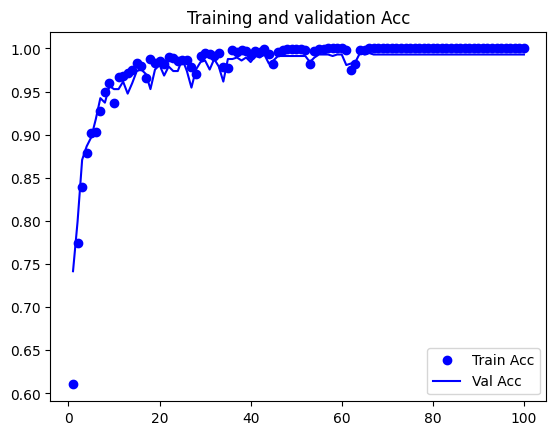

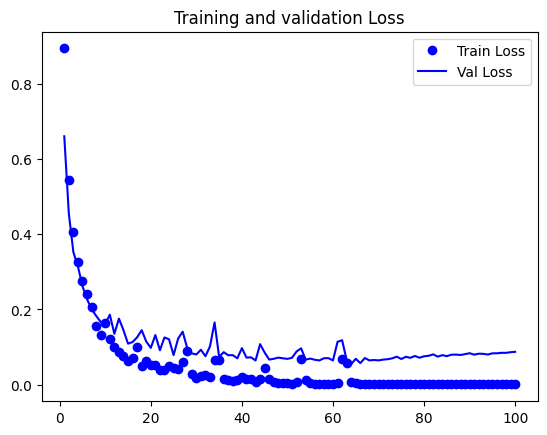

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [48]:
dir_path = '../Model/xyz/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xyz/assets


INFO:tensorflow:Assets written to: ../Model/xyz/assets


## Dataset XYZ Elbows to Hands

In [49]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_hand
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [50]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [52]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,883 (58.14 KB)

 Trainable params: 14,883 (58.14 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.4663 - loss: 1.0031 - val_accuracy: 0.7679 - val_loss: 0.6075
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.5463 - val_accuracy: 0.8150 - val_loss: 0.4088
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8212 - loss: 0.4130 - val_accuracy: 0.8255 - val_loss: 0.4154
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8546 - loss: 0.3539 - val_accuracy: 0.8726 - val_loss: 0.3392
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3380 - val_accuracy: 0.8883 - val_loss: 0.2974
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3089 - val_accuracy: 0.8691 - val_loss: 0.3259
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.2997 - val_accuracy: 0.8970 - val_loss: 0.2828
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9034 - loss: 0.2588 - val_accuracy: 0.9162 - 

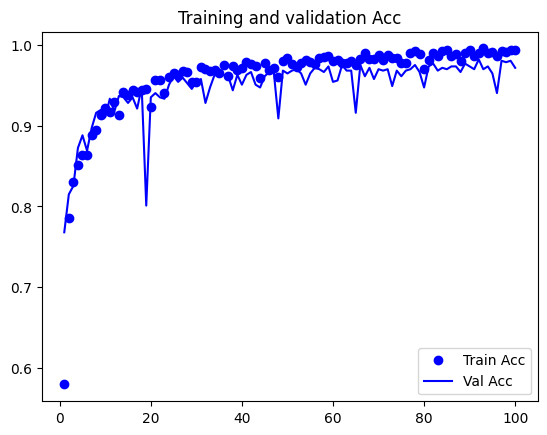

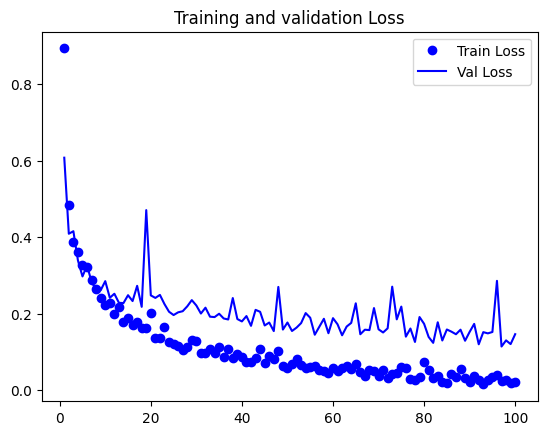

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [56]:
dir_path = '../Model/xyz_hand/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xyz_hand/assets


INFO:tensorflow:Assets written to: ../Model/xyz_hand/assets


## Dataset XY

In [67]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xy.iloc[:, 1:] 
label = dataset_xy.iloc[:, :1] 

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [68]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [70]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,491 (76.14 KB)

 Trainable params: 19,491 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.4185 - loss: 1.0889 - val_accuracy: 0.6754 - val_loss: 0.9759
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.8956 - val_accuracy: 0.7871 - val_loss: 0.6238
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 0.5753 - val_accuracy: 0.7522 - val_loss: 0.5070
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.4253 - val_accuracy: 0.8412 - val_loss: 0.4005
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.3823 - val_accuracy: 0.9092 - val_loss: 0.3144
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.3311 - val_accuracy: 0.8970 - val_loss: 0.2972
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8928 - loss: 0.2910 - val_accuracy: 0.8813 - val_loss: 0.3056
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2455 - val_accuracy: 0.9442 - 

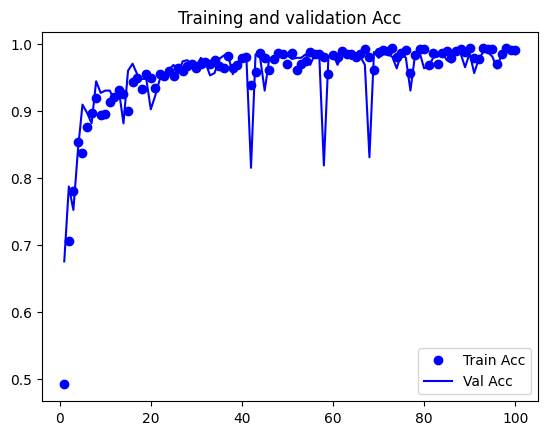

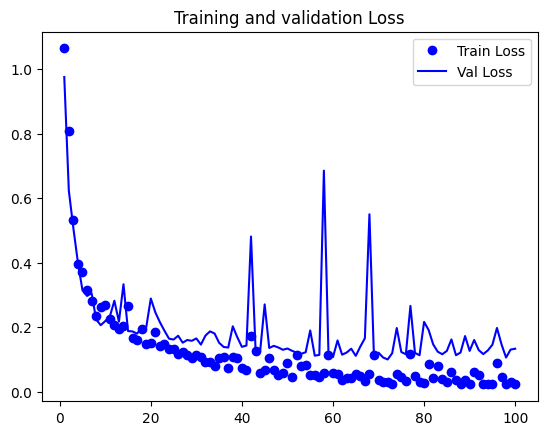

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [74]:
dir_path = '../Model/xy/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xy/assets


INFO:tensorflow:Assets written to: ../Model/xy/assets


## Dataset XY Elbows to Hands

In [78]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xy_hand
label = dataset_xy.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [79]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [81]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,603 (53.14 KB)

 Trainable params: 13,603 (53.14 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.4307 - loss: 1.0659 - val_accuracy: 0.5410 - val_loss: 0.8655
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.7400 - val_accuracy: 0.8290 - val_loss: 0.5142
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.4845 - val_accuracy: 0.8202 - val_loss: 0.4334
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.4228 - val_accuracy: 0.8010 - val_loss: 0.4290
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8146 - loss: 0.4063 - val_accuracy: 0.8691 - val_loss: 0.3702
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.3893 - val_accuracy: 0.8220 - val_loss: 0.3880
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8276 - loss: 0.3706 - val_accuracy: 0.8342 - val_loss: 0.3764
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8273 - loss: 0.3682 - val_accuracy: 0.7923 - 

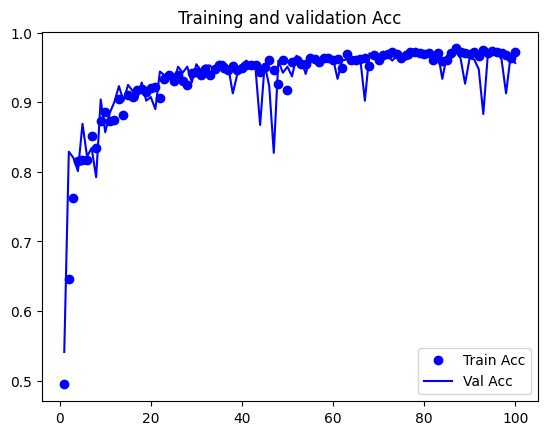

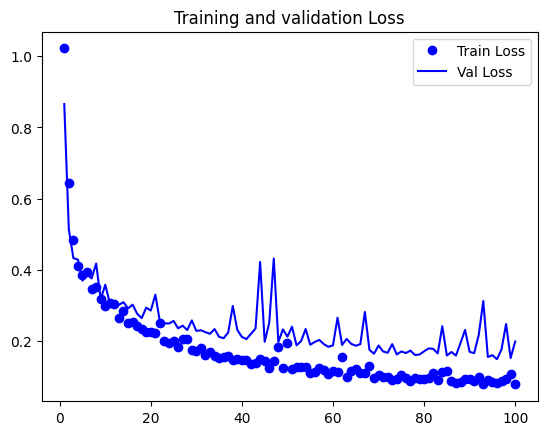

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [85]:
dir_path = '../Model/xy_hand/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xy_hand/assets


INFO:tensorflow:Assets written to: ../Model/xy_hand/assets
